provided a DATASET of ~1.7M records of posts collected from Reddit using Google big query.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from numpy import linalg

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
import plotly.express as px 

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP_project/MBTI_500.csv")

In [7]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


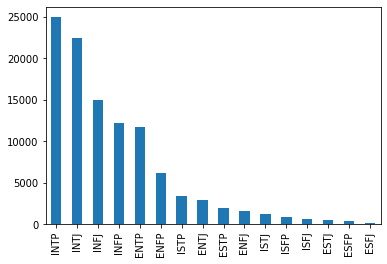

In [8]:
data['type'].value_counts().plot(kind='bar')

In [9]:
data['type'].value_counts() # INTP 24961, ESFJ 181 

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [10]:
data['energy']=data['type'].apply(lambda x:x[0])
data['recognize']=data['type'].apply(lambda x:x[1])
data['judgment']=data['type'].apply(lambda x:x[2])
data['plan']=data['type'].apply(lambda x:x[3])

In [11]:
data

,posts,type,energy,recognize,judgment,plan
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P
106064,schedule modify hey w intp strong wing underst...,INFP,I,N,F,P
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P


In [12]:
data['energy'].value_counts() # I : 80677, E : 25390
data['recognize'].value_counts() # N : 96866, S : 9201
data['judgment'].value_counts() # T : 69203, F : 36864
data['plan'].value_counts() # P : 61632, J : 44435

# N or S 의 데이터가 10 대1로 비대칭임
# 그다음순으로 I or E가 3대1로 비대칭

P    61632
J    44435
Name: plan, dtype: int64

In [13]:
data['posts length']=data['posts'].apply(lambda x:len(x))

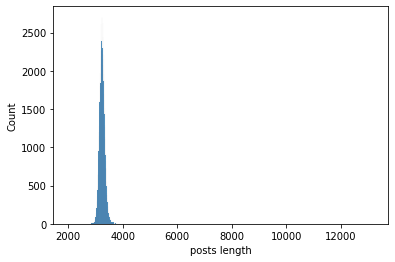

In [14]:
sns.histplot(data['posts length'])

In [15]:
data['voca count']=data['posts'].apply(lambda x:x.split()).apply(lambda x:len(x))

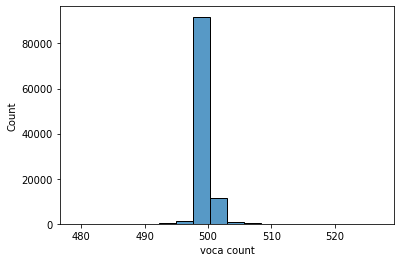

In [16]:
sns.histplot(data['voca count'])

In [17]:
data['voca count'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: voca count, dtype: float64

In [18]:
# 단어들 토큰화
# 불용어 제거

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords # 불용어 제거
from nltk.tokenize import word_tokenize # 단어들 토큰화

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
import re

In [21]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
def delete_shortword(words):
    return shortword.sub('', words)

In [22]:
data['posts']=data['posts'].apply(lambda x : delete_shortword(x))

In [23]:
data['tokenization']=data['posts'].apply(lambda x:word_tokenize(x))

In [24]:
# 불용어 추가

In [25]:
stop = stopwords.words('english') # 불용어
# stop.extend(['intj','entj','istj','estj','infj','enfj','isfj','esfj','intp','entp','istp','estp','infp','enfp','isfp','esfp'])
stop.extend(['smv','iii','ouiiiiiiiiiiiiiiiiiiiiiiiiii','liiiiiike','boiiii'])

In [26]:
data['tokenization'] = data['tokenization'].apply(lambda x: [item for item in x if item not in stop])

In [27]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, intj, tool, use, interaction, people, e..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well..."
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g..."
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ..."
...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,..."
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, intp, strong, wing, un..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[enfj, since, january, busy, schedule, able, s..."


In [28]:
def list2str(words):
    return ' '.join(words)

In [29]:
data['clean posts'] = data['tokenization'].apply(list2str)

In [30]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization,clean posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, intj, tool, use, interaction, people, e...",know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...
...,...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, intp, strong, wing, un...",schedule modify hey intp strong wing understan...
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[enfj, since, january, busy, schedule, able, s...",enfj since january busy schedule able spend li...


# NRCLex 활용

In [31]:
pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 4.9 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=8e76d663c19623ee07f8b733186414f17d3b7a11f6c2b4fd76d651786d718818
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built NRCLex


In [32]:
from nrclex import NRCLex

In [33]:
data['posts emotion'] = data['clean posts'].apply(lambda x : NRCLex(x).raw_emotion_scores)

In [34]:
data['posts emotion']

0         {'negative': 33, 'anger': 16, 'disgust': 6, 'f...
1         {'joy': 28, 'positive': 63, 'sadness': 15, 'tr...
2         {'anticipation': 24, 'joy': 22, 'positive': 63...
3         {'negative': 29, 'joy': 21, 'positive': 45, 'f...
4         {'anger': 18, 'disgust': 8, 'fear': 15, 'negat...
                                ...                        
106062    {'anger': 13, 'disgust': 4, 'negative': 29, 's...
106063    {'anticipation': 19, 'negative': 35, 'sadness'...
106064    {'surprise': 13, 'anger': 11, 'fear': 17, 'neg...
106065    {'anticipation': 20, 'joy': 19, 'positive': 39...
106066    {'anticipation': 40, 'joy': 33, 'positive': 52...
Name: posts emotion, Length: 106067, dtype: object

In [35]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization,clean posts,posts emotion
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, intj, tool, use, interaction, people, e...",know intj tool use interaction people excuse a...,"{'negative': 33, 'anger': 16, 'disgust': 6, 'f..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...,"{'joy': 28, 'positive': 63, 'sadness': 15, 'tr..."
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...,"{'anticipation': 24, 'joy': 22, 'positive': 63..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...,"{'negative': 29, 'joy': 21, 'positive': 45, 'f..."
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...,"{'anger': 18, 'disgust': 8, 'fear': 15, 'negat..."
...,...,...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...,"{'anger': 13, 'disgust': 4, 'negative': 29, 's..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...,"{'anticipation': 19, 'negative': 35, 'sadness'..."
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, intp, strong, wing, un...",schedule modify hey intp strong wing understan...,"{'surprise': 13, 'anger': 11, 'fear': 17, 'neg..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[enfj, since, january, busy, schedule, able, s...",enfj since january busy schedule able spend li...,"{'anticipation': 20, 'joy': 19, 'positive': 39..."


In [36]:
data['posts emotion'][0]

{'negative': 33,
 'anger': 16,
 'disgust': 6,
 'fear': 24,
 'sadness': 15,
 'joy': 17,
 'positive': 61,
 'trust': 45,
 'anticipation': 37,
 'surprise': 17}

In [37]:
rows=[]
df = data['posts emotion']
for type_MBTI, row in zip(data['type'], df):
    row['type'] = type_MBTI
    rows.append(row)
    
emotion_data = pd.DataFrame(rows)


In [38]:
emotion_data.isnull().sum()

negative         3
anger            8
disgust         60
fear             4
sadness          3
joy              6
positive         2
trust            3
anticipation     4
surprise         7
type             0
dtype: int64

In [39]:
# 결측값을 수치 0으로 변경
emotion_data.fillna(0, inplace=True)

In [40]:
emotion_data

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP


In [41]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization,clean posts,posts emotion
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, intj, tool, use, interaction, people, e...",know intj tool use interaction people excuse a...,"{'negative': 33, 'anger': 16, 'disgust': 6, 'f..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...,"{'joy': 28, 'positive': 63, 'sadness': 15, 'tr..."
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...,"{'anticipation': 24, 'joy': 22, 'positive': 63..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...,"{'negative': 29, 'joy': 21, 'positive': 45, 'f..."
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...,"{'anger': 18, 'disgust': 8, 'fear': 15, 'negat..."
...,...,...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...,"{'anger': 13, 'disgust': 4, 'negative': 29, 's..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...,"{'anticipation': 19, 'negative': 35, 'sadness'..."
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, intp, strong, wing, un...",schedule modify hey intp strong wing understan...,"{'surprise': 13, 'anger': 11, 'fear': 17, 'neg..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[enfj, since, january, busy, schedule, able, s...",enfj since january busy schedule able spend li...,"{'anticipation': 20, 'joy': 19, 'positive': 39..."


In [42]:
emotion_data.describe()

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise
count,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000
mean,35.336514,15.448122,10.361526,18.333195,16.281530,25.863926,61.289138,36.932646,29.726833,13.698530
std,8.671706,5.622090,4.301713,6.184098,5.531155,7.341771,10.072386,7.741428,6.905994,4.435965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,12.000000,7.000000,14.000000,12.000000,21.000000,54.000000,32.000000,25.000000,11.000000
50%,35.000000,15.000000,10.000000,18.000000,16.000000,25.000000,61.000000,37.000000,29.000000,13.000000
75%,41.000000,19.000000,13.000000,22.000000,20.000000,30.000000,68.000000,42.000000,34.000000,16.000000
max,124.000000,84.000000,60.000000,113.000000,62.000000,93.000000,142.000000,118.000000,88.000000,90.000000


In [43]:
sample_check = 'intj, entj, istj, estj, infj, enfj, isfj, esfj, intp, entp, istp, estp, infp, enfp, isfp, esfp'

In [44]:
NRCLex(sample_check).raw_emotion_scores # 감정 없음

{}

In [ ]:
# Kmeans 클러스터링 및 t-SNE, PCA 시각화

In [ ]:
# t-SNE

In [ ]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=16))])
X = emotion_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
emotion_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
emotion_data

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type,cluster
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ,2
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ,2
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ,2
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ,3
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ,11
...,...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP,6
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP,3
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP,7
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP,3


In [ ]:
# Visualizing the Clusters with t-SNE
# color : K-means algorithm cluster 기준
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
emotion_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['MBTI type'] = emotion_data['type']
projection['cluster'] = emotion_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'MBTI type'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualizing the Clusters with t-SNE
# color : MBTI type 기준
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
emotion_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['MBTI type'] = emotion_data['type']
projection['cluster'] = emotion_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='MBTI type', hover_data=['x', 'y', 'MBTI type'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualizing the Clusters with PCA
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
emotion_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['MBTI type'] = emotion_data['type']
projection['cluster'] = emotion_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='MBTI type', hover_data=['x', 'y', 'MBTI type'])
fig.show()

NameError: ignored

각 MBTI 별 대표하는 벡터값 찾기

In [142]:
# emotion_mat=emotion_data.copy()

In [145]:
emotion_data

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP


In [237]:
types_MBTI = emotion_data['type'].unique()

In [251]:
# Euclidean distance
def eucl_dist(data1, data2):
    res_val = np.sqrt( sum( (data2-data1)**2 ) )
    return res_val

In [252]:
center_idx = []
for i in types_MBTI:
  temp_df = emotion_data[emotion_data['type'] == i].iloc[:,:-1]
  temp_df.loc[-1] = np.array(temp_df.mean())

  eucl_val = []
  for i in range(len(temp_df)-1):
   eucl_val.append( eucl_dist(temp_df.loc[-1],temp_df.iloc[i]) )

  min_idx=eucl_val.index(min(eucl_val))
  center_idx.append(temp_df.iloc[min_idx].name)

In [253]:
center_idx # 각 MBTI별 중심값

[18164,
 30607,
 47525,
 48144,
 49933,
 52301,
 53950,
 59816,
 61429,
 73329,
 76068,
 76415,
 76878,
 78400,
 83568,
 103993]

In [247]:
# 표준화 진행

In [248]:
scaled_emotion_array=StandardScaler().fit_transform(emotion_data.iloc[:,:10])
scaled_MBTI_emotion_df=pd.DataFrame(scaled_emotion_array, columns=emotion_data.columns[:10]) 
scaled_MBTI_emotion_df=pd.concat([scaled_MBTI_emotion_df,emotion_data['type']], axis=1)

In [249]:
scaled_MBTI_emotion_df

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,-0.269442,0.098163,-1.013909,0.916355,-0.231694,-1.207334,-0.028706,1.042106,1.053172,0.744254,INTJ
1,-0.154124,0.631775,1.078290,-0.700703,-0.231694,0.290949,0.169857,0.654579,0.473963,0.744254,INTJ
2,-0.384760,-0.257578,0.613357,-0.538997,0.129896,-0.526296,0.169857,0.137876,-0.829259,2.096841,INTJ
3,-0.730715,-0.613320,-0.316509,-0.538997,-0.593284,-0.662503,-1.617215,-2.316463,-1.408469,-1.735488,INTJ
4,-0.500079,0.453904,-0.548976,-0.538997,-0.412489,-0.798711,-0.028706,0.525403,0.039555,-0.608333,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,-0.730715,-0.435449,-1.478843,0.107826,-0.050899,-0.662503,-1.220088,-1.670584,-0.105247,-0.382902,INFP
106063,-0.038806,-1.680543,-1.246376,-0.538997,0.129896,-1.071126,-0.922242,-0.895530,-1.553272,-1.960920,INFP
106064,-0.500079,-0.791190,-1.013909,-0.215585,-0.231694,0.290949,-0.028706,-1.541408,-0.105247,-0.157470,INFP
106065,-1.191987,-0.791190,-0.084043,-1.185820,-0.954874,-0.934919,-2.212906,-1.153881,-1.408469,-1.510057,INFP


In [256]:
scaled_MBTI_emotion_df.loc[center_idx] # 각 MBTI별 중심값

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
18164,0.076512,-0.435449,0.613357,-0.053880,-0.050899,-0.117673,0.269139,0.267052,0.039555,-0.157470,INTJ
30607,-0.154124,0.098163,-0.084043,0.107826,0.129896,-0.253881,-0.127988,0.396228,-0.105247,-0.157470,INTP
47525,-0.269442,-0.435449,0.148424,-0.377291,-0.050899,-0.117673,-0.326552,-0.637178,-0.539654,0.518823,ISFJ
48144,-0.269442,-0.791190,-0.316509,-0.215585,0.310691,-0.253881,-0.624397,0.008700,-0.394852,-0.157470,ISFP
49933,0.076512,0.276033,-0.548976,-0.377291,-0.050899,0.154742,-0.028706,0.267052,-0.105247,-0.157470,ISTJ
52301,0.653103,0.276033,0.380891,0.916355,-0.050899,-0.390088,-0.326552,-0.508002,-0.250050,0.293392,ISTP
53950,-0.269442,-0.079708,-0.316509,-0.053880,-0.412489,0.427157,-0.425833,-0.120475,0.039555,0.293392,ENFJ
59816,-0.038806,-0.079708,-0.316509,-0.215585,0.129896,0.427157,-0.028706,0.137876,0.473963,0.067961,ENFP
61429,-0.269442,-0.613320,-0.084043,-0.215585,-0.050899,-0.253881,-0.127988,0.137876,-0.394852,0.293392,ENTJ
73329,-0.154124,-0.079708,0.380891,-0.053880,-0.231694,-0.253881,0.169857,0.008700,0.039555,-0.157470,ENTP
